In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

#creating random datapoints
def create_random(r, n=100):
    return [(math.cos(2*math.pi/n*x)*r*np.random.normal(-30,30), 
             math.sin(2*math.pi/n*x)*r*np.random.normal(-30,30)) for x in range(1, n+1)]

In [3]:
#random dataframe
df1 = pd.DataFrame(create_random(50,1000))
df2 = pd.DataFrame(create_random(30, 700))
df3 = pd.DataFrame(create_random(10,300))

#Add Noise 
df4 = pd.DataFrame(
    [(np.random.randint(-600,600), np.random.randint(-600,600)) for i in range(300)]
)

In [4]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

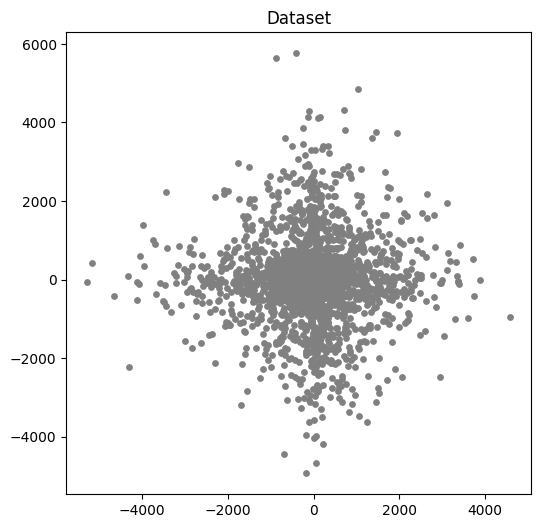

In [5]:
plt.figure(figsize=(6,6))
plt.scatter(df[0], df[1], s=15, c='grey')
plt.title('Dataset')
plt.show()

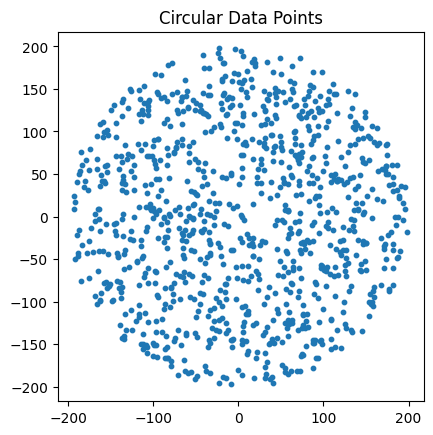

In [6]:
def circular_data(num_points, radius):
    angles = np.random.uniform(0, 2 * np.pi, num_points)
    radii = radius * np.sqrt(np.random.uniform(0, 1, num_points))
    # Convert polar coordinates to Cartesian coordinates
    x = radii * np.cos(angles)
    y = radii * np.sin(angles)
    
    return x, y

num_points = 1000
radius = 200
circular_x, circular_y = circular_data(num_points, radius)

# Plot the points
plt.scatter(circular_x, circular_y, s=10)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Circular Data Points')
plt.show()

In [7]:
from sklearn import cluster, datasets, mixture
from sklearn.datasets import make_blobs

In [8]:
#creating different datasets

n_samples = 1500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
X_aniso = np.dot(X, transformation)  # Anisotropic blobs

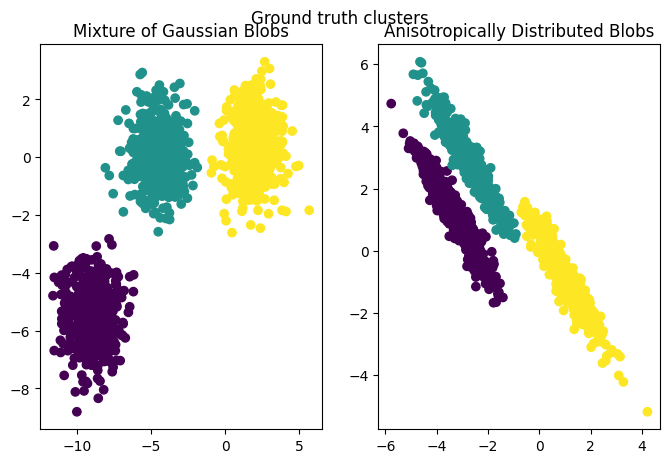

In [9]:

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

ax1.scatter(X[:, 0], X[:, 1], c=y)
ax1.set_title("Mixture of Gaussian Blobs")

ax2.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y)
ax2.set_title("Anisotropically Distributed Blobs")

plt.suptitle("Ground truth clusters").set_y(0.95)
plt.show()

In [10]:
len(X[:,0])

1500

In [11]:
len(X[:,1])

1500

In [12]:
len(y)

1500

DIFFERENT CLUSTERS ON THE SAME DATA

In [13]:
#Kmeans on Different Datasets
from sklearn.cluster import KMeans

common_params = {
    "n_init": "auto",
    "random_state": random_state
}

df_kmeans = KMeans(n_clusters=4, **common_params).fit(df)
df["Labels"] = df_kmeans.labels_

blob_kmeans = KMeans(n_clusters=3, **common_params).fit(X)
#change np.array to dataframe
x_data = pd.DataFrame(X)
y_data = pd.DataFrame(y)
x_data["Labels"] = blob_kmeans.labels_

aniso_kmeans = KMeans(n_clusters=3, **common_params).fit(X_aniso)
aniso_data = pd.DataFrame(X_aniso)
aniso_data['Labels'] = aniso_kmeans.labels_

circular_kmeans = KMeans(n_clusters=4, **common_params).fit(circular_x.reshape(-1,1))
cir_x = pd.DataFrame(circular_x.reshape(-1,1))
cir_y = pd.DataFrame(circular_y.reshape(-1,1),columns=[1])
circular = pd.concat([cir_x, cir_y], axis=1)
circular['Labels'] = circular_kmeans.labels_


In [14]:
df

,0,1,Labels
0,-754.913869,-10.727818,0
1,-528.425467,9.858621,3
2,-1850.901195,-34.892334,0
3,868.544841,-8.766581,3
4,-2203.123934,-21.552804,0
...,...,...,...
2295,-229.000000,-504.000000,3
2296,392.000000,-580.000000,3
2297,134.000000,525.000000,3
2298,469.000000,-535.000000,3


Text(0.5, 1.0, 'KMeans on Circular data')

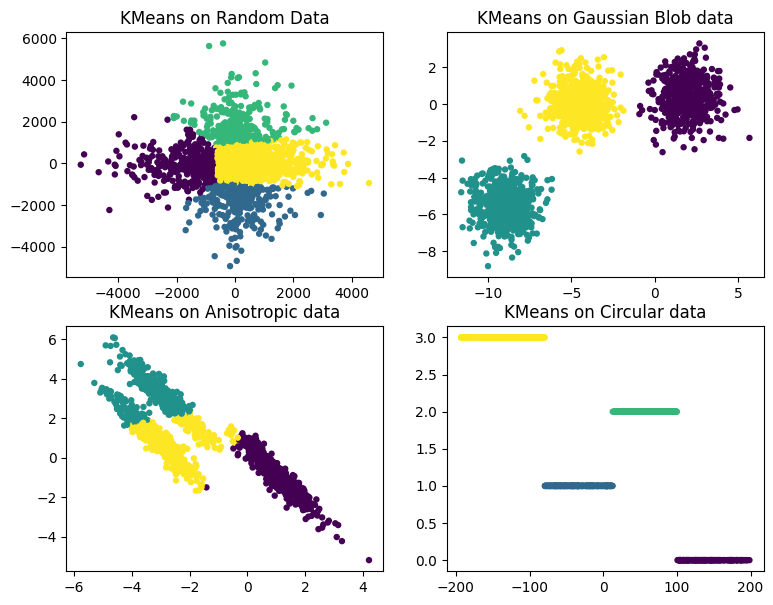

In [15]:
fig, axs =  plt.subplots(nrows=2, ncols=2, figsize=(9,7))

axs[0,0].scatter(df.iloc[:,0], df.iloc[:,1], c=df['Labels'], s=13)
axs[0,0].set_title("KMeans on Random Data")

axs[0,1].scatter(x_data.iloc[:,0], x_data.iloc[:,1], c=x_data['Labels'], s=13)
axs[0,1].set_title("KMeans on Gaussian Blob data")

axs[1,0].scatter(aniso_data.iloc[:,0], aniso_data.iloc[:,1], c=aniso_data['Labels'], s=13)
axs[1,0].set_title("KMeans on Anisotropic data")

axs[1,1].scatter(x=circular.iloc[:,0], y=circular.iloc[:,2], c=circular['Labels'], s=13)
axs[1,1].set_title("KMeans on Circular data")

In [22]:
#Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

In [28]:

df_agglo = AgglomerativeClustering(n_clusters=4).fit(df[[0,1]])
df["Agglo_Labels"] = df_agglo.labels_

blob_agglo = AgglomerativeClustering(n_clusters=3).fit(X)
#change np.array to dataframe
#x_data = pd.DataFrame(X)
#y_data = pd.DataFrame(y)
x_data["Agglo_Labels"] = blob_agglo.labels_

aniso_agglo = AgglomerativeClustering(n_clusters=3).fit(X_aniso)
#aniso_data = pd.DataFrame(X_aniso)
aniso_data['Agglo_Labels'] = aniso_agglo.labels_

circular_agglo = AgglomerativeClustering(n_clusters=4).fit(circular_x.reshape(-1,1))
#cir_x = pd.DataFrame(circular_x.reshape(-1,1))
#cir_y = pd.DataFrame(circular_y.reshape(-1,1),columns=[1])
#circular = pd.concat([cir_x, cir_y], axis=1)
circular['Agglo_Labels'] = circular_agglo.labels_


In [33]:
circular

,0,1,Labels,Agglo_Labels
0,24.444732,-50.426677,2,0
1,-113.848820,-149.294236,3,1
2,-33.555878,-44.600029,1,1
3,116.366532,121.371225,0,0
4,-112.576508,-155.332085,3,1
...,...,...,...,...
995,-43.659808,-17.322956,1,1
996,-136.999325,118.561576,3,3
997,-34.057715,18.653892,1,1
998,-112.077132,-46.103161,3,1


Text(0.5, 1.0, 'Agglo_Clustering on Circular data')

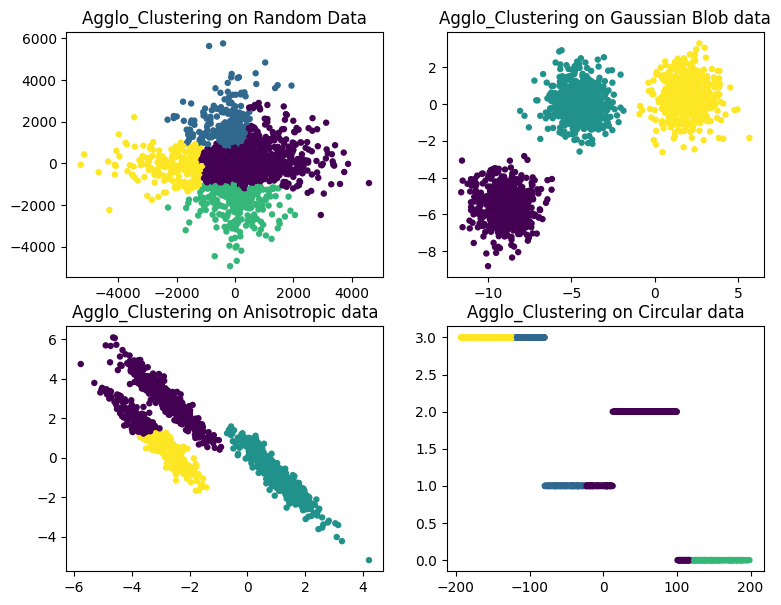

In [34]:
fig, axs =  plt.subplots(nrows=2, ncols=2, figsize=(9,7))

#Using Agglomerative Labels to cluster the Data
axs[0,0].scatter(df.iloc[:,0], df.iloc[:,1], c=df['Agglo_Labels'], s=13)
axs[0,0].set_title("Agglo_Clustering on Random Data")

axs[0,1].scatter(x_data.iloc[:,0], x_data.iloc[:,1], c=x_data['Agglo_Labels'], s=13)
axs[0,1].set_title("Agglo_Clustering on Gaussian Blob data")

axs[1,0].scatter(aniso_data.iloc[:,0], aniso_data.iloc[:,1], c=aniso_data['Agglo_Labels'], s=13)
axs[1,0].set_title("Agglo_Clustering on Anisotropic data")

axs[1,1].scatter(x=circular.iloc[:,0], y=circular.iloc[:,2], c=circular['Agglo_Labels'], s=13)
axs[1,1].set_title("Agglo_Clustering on Circular data")

In [35]:
from sklearn.cluster import DBSCAN

In [39]:
dbs = DBSCAN(min_samples=10, n_jobs=2)
#might there be an optimization technique for eps & min_sampples?

df_db = dbs.fit(df[[0,1]])
df["DB_Labels"] = df_db.labels_

blob_db = dbs.fit(X)
x_data["DB_Labels"] = blob_db.labels_

aniso_db = dbs.fit(X_aniso)
aniso_data['DB_Labels'] = aniso_db.labels_

circular_db = dbs.fit(circular_x.reshape(-1,1))
circular['DB_Labels'] = circular_db.labels_


In [41]:
x_data

,0,1,Labels,Agglo_Labels,DB_Labels
0,-5.198113,0.641869,2,1,0
1,-5.752295,0.418627,2,1,0
2,-10.844898,-7.553523,1,0,-1
3,-4.570985,-0.801017,2,1,0
4,-3.519162,0.039345,2,1,0
...,...,...,...,...,...
1495,-8.527192,-6.726876,1,0,2
1496,-4.062208,0.950773,2,1,0
1497,1.361053,-0.907492,0,2,1
1498,-0.354141,0.712242,0,2,-1


Text(0.5, 1.0, 'DBS on Circular data')

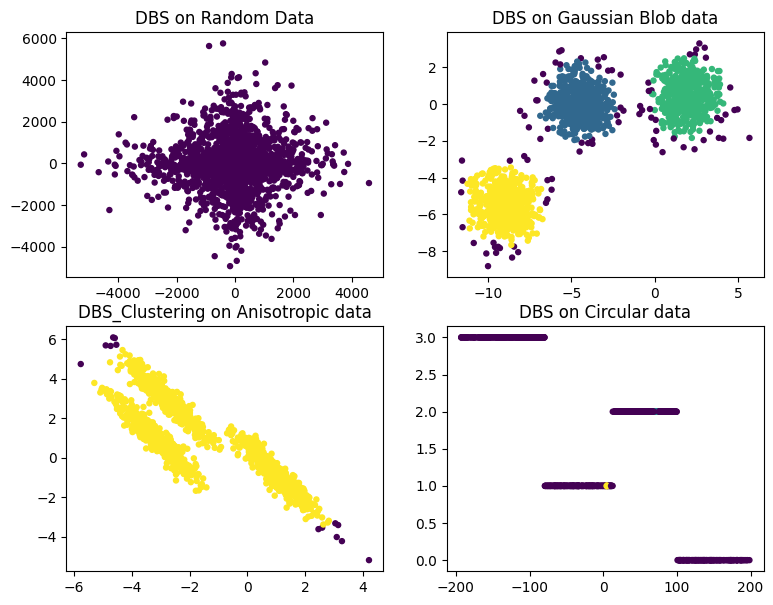

In [42]:
fig, axs =  plt.subplots(nrows=2, ncols=2, figsize=(9,7))

#Using Density_Based Labels to cluster the Data
axs[0,0].scatter(df.iloc[:,0], df.iloc[:,1], c=df['DB_Labels'], s=13)
axs[0,0].set_title("DBS on Random Data")

axs[0,1].scatter(x_data.iloc[:,0], x_data.iloc[:,1], c=x_data['DB_Labels'], s=13)
axs[0,1].set_title("DBS on Gaussian Blob data")

axs[1,0].scatter(aniso_data.iloc[:,0], aniso_data.iloc[:,1], c=aniso_data['DB_Labels'], s=13)
axs[1,0].set_title("DBS_Clustering on Anisotropic data")

axs[1,1].scatter(x=circular.iloc[:,0], y=circular.iloc[:,2], c=circular['DB_Labels'], s=13)
axs[1,1].set_title("DBS on Circular data")

In [43]:
from sklearn.cluster import MeanShift

In [44]:
mns = MeanShift(n_jobs=2)

df_mean = mns.fit(df[[0,1]])
df["Mean_Shift_Labels"] = df_mean.labels_

blob_mean = mns.fit(X)
x_data["Mean_Shift_Labels"] = blob_mean.labels_

aniso_mean = mns.fit(X_aniso)
aniso_data['Mean_Shift_Labels'] = aniso_mean.labels_

circular_mean = mns.fit(circular_x.reshape(-1,1))
circular['Mean_Shift_Labels'] = circular_mean.labels_

In [45]:
aniso_data

,0,1,Labels,Agglo_Labels,DB_Labels,Mean_Shift_Labels
0,-3.424694,3.856715,1,0,0,0
1,-3.670550,4.019227,1,0,0,0
2,-3.508982,0.465036,2,2,0,0
3,-2.453220,2.227331,1,0,0,0
4,-2.156954,2.274100,1,0,0,0
...,...,...,...,...,...,...
1495,-2.437013,-0.305843,2,2,0,0
1496,-2.859975,3.396865,1,0,0,0
1497,1.199043,-1.640212,0,1,0,1
1498,-0.506659,0.832681,2,1,0,1


Text(0.5, 1.0, 'Mean_Shift on Circular data')

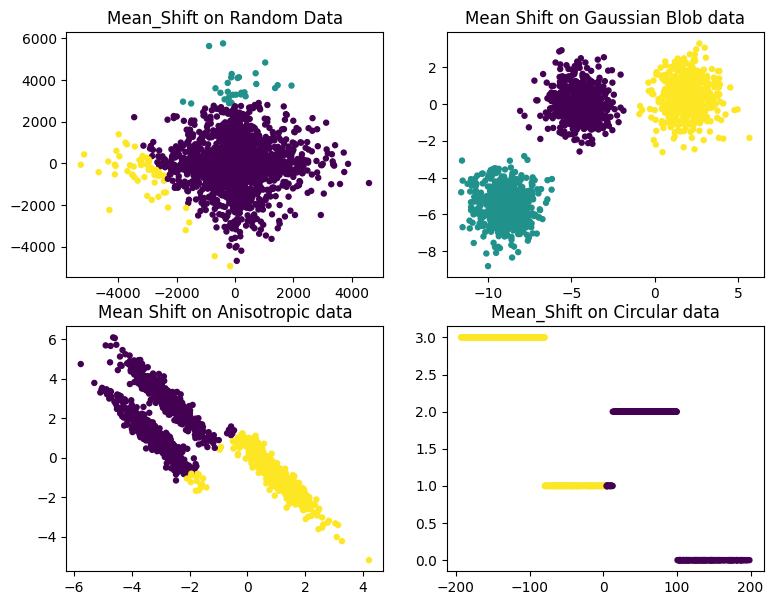

In [46]:
fig, axs =  plt.subplots(nrows=2, ncols=2, figsize=(9,7))

#Using Mean Shift Labels to cluster the Data
axs[0,0].scatter(df.iloc[:,0], df.iloc[:,1], c=df['Mean_Shift_Labels'], s=13)
axs[0,0].set_title("Mean_Shift on Random Data")

axs[0,1].scatter(x_data.iloc[:,0], x_data.iloc[:,1], c=x_data['Mean_Shift_Labels'], s=13)
axs[0,1].set_title("Mean Shift on Gaussian Blob data")

axs[1,0].scatter(aniso_data.iloc[:,0], aniso_data.iloc[:,1], c=aniso_data['Mean_Shift_Labels'], s=13)
axs[1,0].set_title("Mean Shift on Anisotropic data")

axs[1,1].scatter(x=circular.iloc[:,0], y=circular.iloc[:,2], c=circular['Mean_Shift_Labels'], s=13)
axs[1,1].set_title("Mean_Shift on Circular data")

In [47]:
"""
Each different cluster has labelled the data into various numbers using thier respective techniques.
Now, we have to compare the labels from the different clusters and see where the data do or do not align.
"""

'\nEach different cluster has labelled the data into various numbers using thier respective techniques.\nNow, we have to compare the labels from the different clusters and see where the data do or do not align\n'

In [55]:
#using the random dataset to test out the different labels

class_kmeans = df.groupby(['Labels'], group_keys=False)

class_agglo = df.groupby(['Agglo_Labels'], group_keys=False)
class_db = df.groupby(['DB_Labels'], group_keys=False)
class_mean_shift = df.groupby(['Mean_Shift_Labels'], group_keys=False)


In [56]:
class_kmeans.apply(lambda x: x.value_counts())

C:\Users\Hp Pc\AppData\Local\Temp\ipykernel_6848\2587430447.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  class_kmeans.apply(lambda x: x.value_counts())


0             1             Labels  Agglo_Labels  DB_Labels  Mean_Shift_Labels
-5275.588812  -63.179819    0       3             -1         2                    1
-1017.145456   123.065472   0       0             -1         0                    1
-1025.782433   170.428056   0       0             -1         0                    1
-1026.382581  -1019.720161  0       2             -1         0                    1
-1038.844879   115.987827   0       0             -1         0                    1
                                                                                 ..
-50.945075     87.423352    3       0             -1         0                    1
-51.000000    -148.000000   3       0             -1         0                    1
-51.025191    -777.022282   3       0             -1         0                    1
-53.648250     1.139088     3       0             -1         0                    1
 4583.849437  -943.517896   3       0             -1         0                   